# Plotly

https://plotly.com/python

In [1]:
!pip install plotly
!pip install dash 
!pip install wordcloud
!pip install cufflinks
!pip install missingno

     --------------------------------------- 10.2/10.2 MB 11.3 MB/s eta 0:00:00
     -------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 81.7/81.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68725 sha256=a4106a6c17558402c8e7c0038c107130655d61c2c7c6e00b228a0d6042e13300
  Stored in directory: c:\users\jawed\appdata\local\pip\cache\wheels\b1\8f\ec\b76ac80a14f3f5f59643cbc2eee7d78690b1bd158279f299dd
Successfully built cufflinks


In [2]:
from plotly.offline import init_notebook_mode, iplot, plot

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
# plotly
import plotly as py
init_notebook_mode(connected = True) #inline olarak görüntülemek için başlatıyoruz same to = %matplotlib inline
import plotly.graph_objs as go # veri görselleştirme için düşük düzey arayüz
import plotly.express as px # veri görselleştirme için üst düzey arayüz kısaca daha komplex bir görsel için daha az kod satırı
#!pip install dash
from dash import Dash, dcc, html, Input, Output #dcc interaktiflik kazandırıyor,
# word cloud library
from wordcloud import WordCloud
# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
cf.go_offline() #grafikleri offline olarak yapıyoruz
# warnings
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import init_notebook_mode, iplot, plot

In [4]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")

In [5]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [6]:
timesData.sample(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2071,251-300,Iowa State University,United States of America,31.2,35.4,29.4,61.5,54.0,-,"29,991",17.4,11%,44 : 56,2016
2203,351-400,Wayne State University,United States of America,31.9,29.6,14.2,65.3,41.7,-,"23,065",10.7,7%,57 : 43,2016
348,149,"Birkbeck, University of London",United Kingdom,25.9,85.3,25.8,80.8,25.1,46.8,"9,454",17.2,38%,55 : 45,2012
972,351-400,Paris Dauphine University,France,22.0,57.6,12.7,50.6,29.4,-,"9,565",15.4,28%,53 : 47,2013
841,226-250,Tulane University,United States of America,42.8,31.2,22.6,66.8,-,-,"11,381",8.4,8%,56 : 44,2013
743,142,University of Basel,Switzerland,37.1,89.8,23.2,87.8,64.2,52.8,"12,551",17.3,24%,54 : 46,2013
2051,201-250,University of Victoria,Canada,20.6,70.2,30.0,79.0,36.6,-,"17,581",21.5,11%,56 : 44,2016
237,38,Australian National University,Australia,62.8,93.8,75.1,72.6,41.7,71.2,"14,604",19.2,35%,52 : 48,2012
2431,601-800,University of Calcutta,India,34.7,13.1,8.7,19.8,29.2,-,"18,511",32.5,0%,NaN,2016
1990,188,Paris-Sud University,France,38.7,64.2,29.0,79.8,28.8,49.8,"27,603",15.0,17%,NaN,2016


In [8]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


<Axes: >

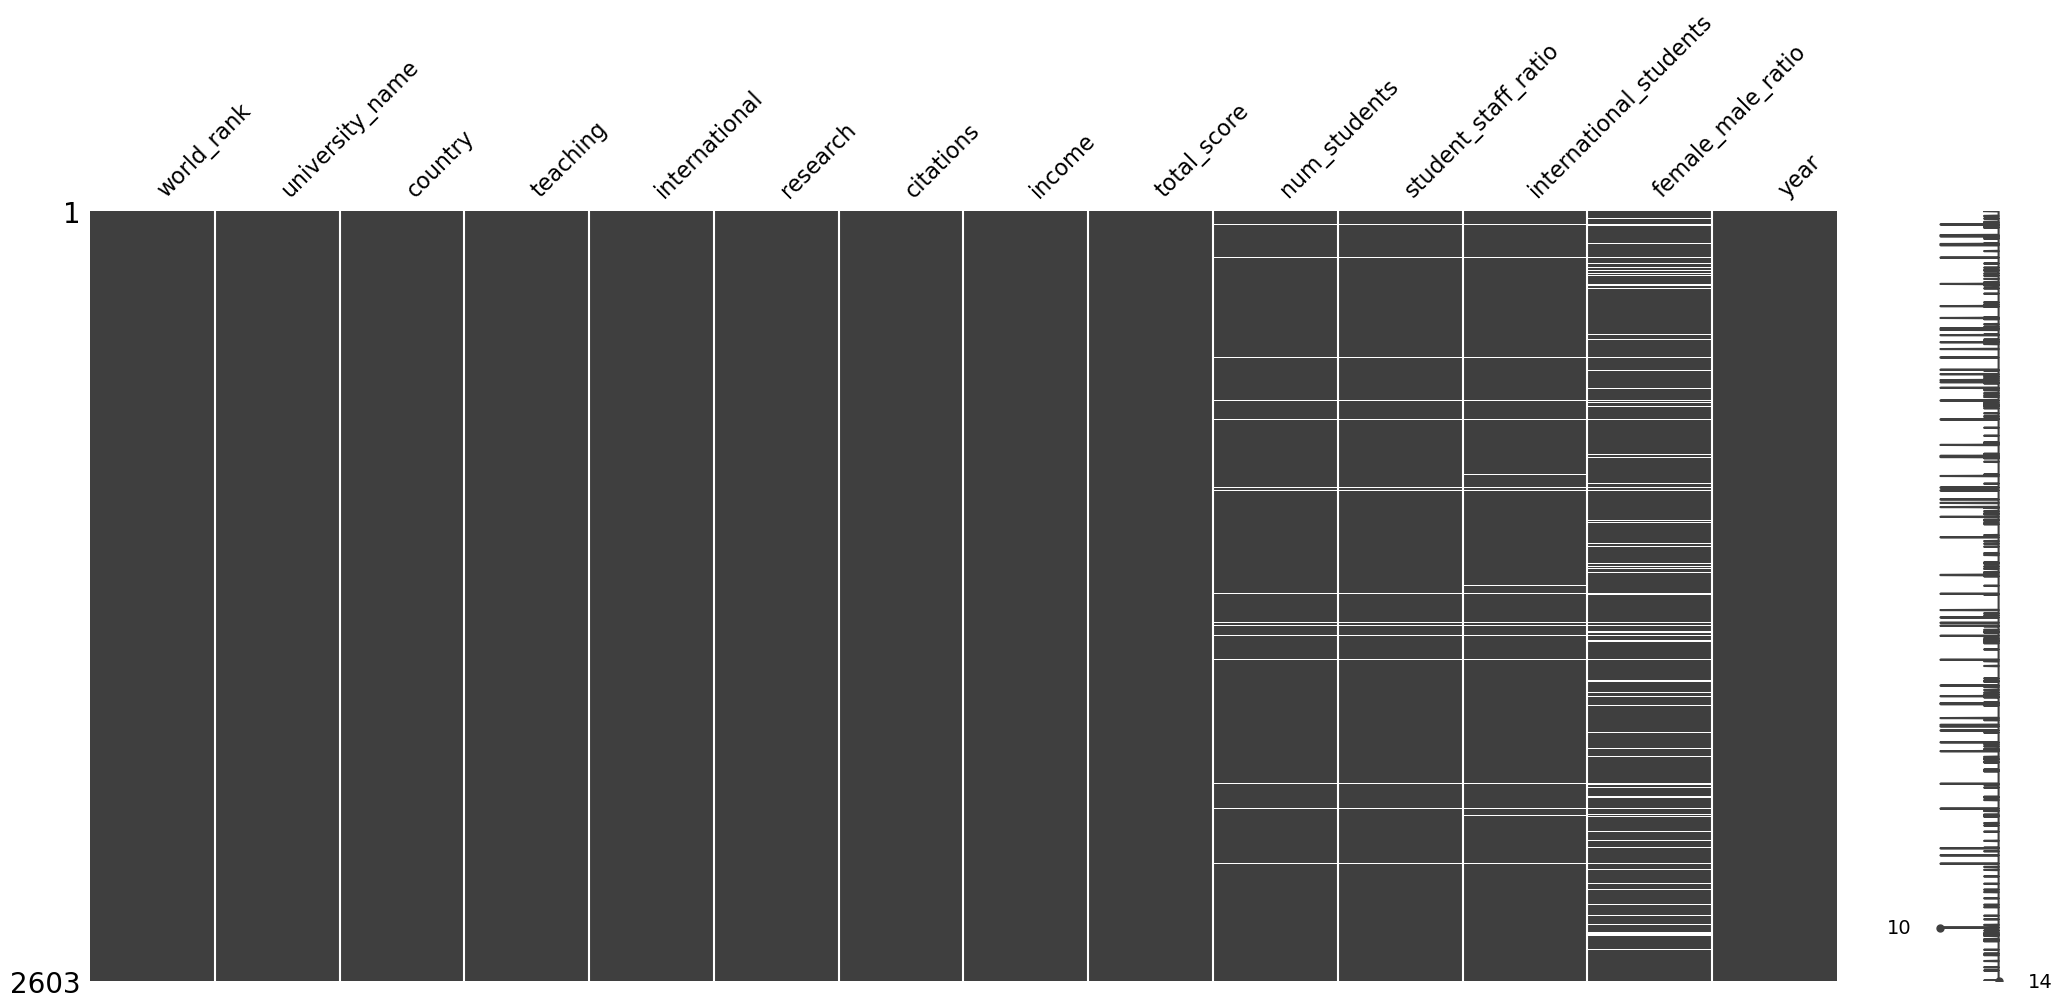

In [10]:
import missingno
missingno.matrix(timesData);

In [12]:
timesData.isnull().sum() # if we don't use sum, it'll bring like bool

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [13]:
df = timesData.iloc[:100,:]
df.shape

(100, 14)

In [14]:
import plotly.graph_objs as go

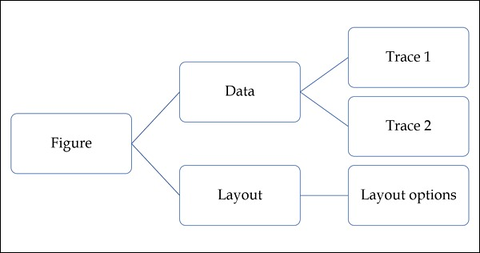
Bu gorsel plotly de figure shemasini gostermektedir.

In [15]:
#plt.style.use("ggplot")
# creating trace 1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",    #Bu dağılım izi için çizim modunu belirler. "mode=text" ise text'i yazdırır "text" öğeleri koordinatlarda görünür.
                                        #Aksi takdirde, fareyle üzerine gelindiğinde "text" öğeleri görünür.
                                        #20'den az nokta varsa ve iz yığınlanmamışsa varsayılan değer "lines+markers"dir. Aksi takdirde, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star",
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)
data = [trace1, trace2]
layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", #axes olarak düşünebiliriz
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))
fig = dict(data = data, layout = layout)  #figure içine yukarıda tanımladığımız grafik değişkenlerini ve layout parametrelerini dict olarak verip
iplot(fig)                                #iplot(fig) ile çizdiriyoruz.

## Zero kullanimi

In [16]:
fig = px.line(y=[1, -1], x=[-1,1])
fig.update_xaxes(zeroline=False,linewidth=6, zerolinecolor='rgba(0,255,0,0.5)')
fig.update_yaxes(zeroline=True, zerolinewidth=6, zerolinecolor='rgba(0,0,255,0.5)')
fig.show()

## Ticklen kullanimi

In [17]:
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", facet_col="species")
fig.update_xaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=20)
fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, col=1)
fig.show()

In [18]:
dataset = sns.load_dataset('tips')
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


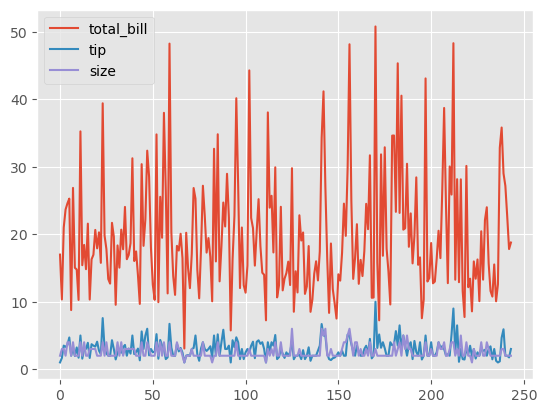

In [19]:
plt.style.use('ggplot')
dataset2 = dataset[["total_bill", "tip", "size"]]
dataset2.plot();

In [20]:
plt.style.use('ggplot')
dataset2 = dataset[["total_bill", "tip", "size"]]
dataset2.iplot();

In [21]:
plt.style.use('ggplot')
dataset2 = dataset[["total_bill", "tip", "size"]]
dataset2.iplot();

In [22]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100, :]  # iloc ile indexleme yaparak istediğimiz yıllara ait verileri yeni df olarak oluşturuyoruz.
df2015 = timesData[timesData.year == 2015].iloc[:100, :]
df2016 = timesData[timesData.year == 2016].iloc[:100, :]

In [23]:
# creating trace 1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)
# creating trace 3
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))
fig = dict(data = data, layout = layout)
iplot(fig)

# Bar Charts

seaborn da olduğu gibi plotlyde de içine embed veri setleri var. Bunlardan çalışalım biraz ülkelerin popülasyonu ile ilgili bir veri seti çağıracağız.
data setleri hakkında kısa bilgi için "http://plotly.github.io/datasets/
Datamız yıllara sari olarak ülke bilgilerini içeriyor
LifeExp=Ortalama Ömür
pop = poülasyon
gdpPercap = kişi başı gelir yıllık yada kişi alım gücü
iso_num = ülkenin numarası

In [24]:
gm = px.data.gapminder()
gm

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [25]:
gm_usa = px.data.gapminder().query("country =='United States'")
px.bar(gm_usa, x = "year", y = "pop")

In [26]:
gm_usa = px.data.gapminder().query("country =='Afghanistan'")
px.bar(gm_usa, x = "year", y = "pop")

In [27]:
df_europe = px.data.gapminder().query("continent =='Europe' and year == 2007 and pop > 5.e6" )
fig = px.bar(df_europe, y= "pop", x= "country", text = "pop", color ="country")
fig.update_traces(textposition = "outside", texttemplate = "%{text:.3s}", textfont_size=12) #int, s, f verdiğimizde type göre işlem yapıyor
fig.update_layout(xaxis_tickangle = -45,
                  font_family="Arial",
                  font_color="red",
                  font_size = 12)

In [29]:
df1 = (df.str.replace(",", "")).astype("float")

AttributeError: 'DataFrame' object has no attribute 'str'

In [30]:
df2 = list((df.str.replace(",", "")).astype("float"))
df2

AttributeError: 'DataFrame' object has no attribute 'str'

In [32]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
df = df2016.num_students
df.count()

7

In [33]:
pie_list =[float(each.replace(",", ""))for each in df2016.num_students]
pie_list

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

In [34]:
labels = df2016.university_name
# figure
fig = {
    "data" : [
        {
            "values" : pie_list,
            "labels" : labels,
            "domain" : {"x": [0, .5]},
            "name" : "Number Of Students Rates",
            "hoverinfo" : "label + percent",
            "hole" : .2,
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2, 0.2] #exploded
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students rates",
        "annotations" : [
            {"font" : {"size" : 20},
             "text" : "Number of Students",
             "x" : 0.3,
             "y" : 1
            },
        ]
    }
}
iplot(fig)

In [35]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', names='country', title='Population of European continent')
fig.show()

## Bubble chart

In [36]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size = [float(each.replace(",", ".")) for each in df2016.num_students]
num_students_size

[2.243,
 19.919,
 15.596,
 18.812,
 11.074,
 20.152,
 7.929,
 15.06,
 18.178,
 14.221,
 15.128,
 11.751,
 36.186,
 26.607,
 25.055,
 38.206,
 20.376,
 21.424,
 66.198,
 15.172]

In [37]:
df2016.international
international_color = [float(each) for each in df2016.international]
data = [
    {
        "y" : df2016.teaching,
        "x" : df2016.world_rank,
        "mode" : "markers",
        "marker" : {
            "color" : international_color,
            "size" : num_students_size,
            "showscale" : True
        },
        "text" : df2016.university_name
    }
]
iplot(data)

In [39]:
df = px.data.gapminder()
fig = px.scatter(df.query("year==2007"), x = "gdpPercap", y = "lifeExp",
                size = "pop", color = "continent",
                 hover_name = "country", log_x = True, size_max = 50)
fig

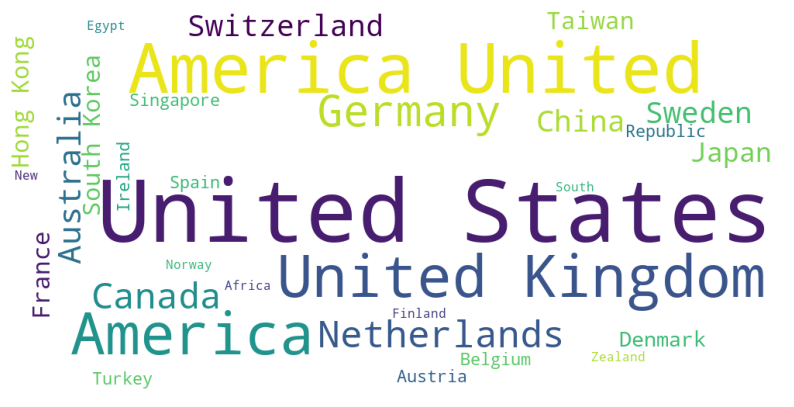

In [40]:
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize = (10, 10))
wordcloud = WordCloud(background_color= "white",
                      width = 1000,
                      height= 500).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png") # save graph in your computer
plt.show()

In [41]:
trace1 = go.Scatter3d(
                    x = df2015.world_rank,
                    y = df2015.research,
                    z = df2015.citations,
                    mode = "markers",
                    marker = dict(size = 7, color = "rgb(255, 0, 0)",))
data = [trace1]
layout = go.Layout()
fig = go.Figure(data = data, layout = layout)
iplot(fig)